In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [25]:

new = pd.read_csv("./results/new_res.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
# calculate the f1 with precision and recall
new['f1'] = 2 * (new['precision'] * new['recall']) / (new['precision'] + new['recall'])

transitions = pd.read_csv("./results/results.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
Activity = pd.read_csv("./results/Activity.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
sample = pd.read_csv("./results/results_sample.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
Activity_Patterns = pd.read_csv("./results/activity_onlypatterns.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
Transitions_Patterns = pd.read_csv("./results/transition_only_patterns.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)


In [26]:
transitions.head(5)

,deviation_rate,injected,accuracy_score,ball_acc,precision,recall,roc_auc_score,fpr,tpf,thresholds
0,5,0,0.9997,0.49995,0.0,0.0,0.49995,[0.0000000e+00 9.9990001e-05 1.0000000e+00],[0. 0. 1.],[2. 1. 0.]
1,5,50,0.9998,0.50000,0.0,0.0,0.50000,[0. 1.],[0. 1.],[1. 0.]
2,5,100,0.9997,0.49995,0.0,0.0,0.49995,[0.0000000e+00 9.9990001e-05 1.0000000e+00],[0. 0. 1.],[2. 1. 0.]
3,5,250,0.9998,0.50000,0.0,0.0,0.50000,[0. 1.],[0. 1.],[1. 0.]
4,5,500,0.9998,0.50000,0.0,0.0,0.50000,[0. 1.],[0. 1.],[1. 0.]


In [37]:
# function to create a plot for a specific column, per deviation_rate
# x-axis: amount_injected
# y-axis: column
def plot_column(csv,column, title, col='injected',legend=True):
    csv = csv[csv['injected'] != 5000]
    fig, ax = plt.subplots()
    for deviation_rate in csv.deviation_rate.unique():
        csv[csv.deviation_rate == deviation_rate].plot(x=col, y=column, ax=ax, label=deviation_rate)
    ax.set_title(title)
    ax.set_xlabel("nr of injected sessions")
    ax.set_ylabel('score')
    if legend:
        ax.legend(loc='best')
    else:
        ax.get_legend().remove()
    plt.show()


In [28]:
# function to create a bar plot for a specific column, per deviation_rate
def plot_column_bar(csv,column, title,col='injected',legend=True):
    csv = csv[csv['injected'] != 5000]
    fig, ax = plt.subplots()
    for deviation_rate in csv.deviation_rate.unique():
        csv[csv.deviation_rate == deviation_rate].plot.bar(x=col, y=column, ax=ax, label=deviation_rate)
    ax.set_title(title)
    ax.set_xlabel("nr of injected sessions")
    ax.set_ylabel('score')
    if legend:
        ax.legend(loc='best')
    else:
        ax.get_legend().remove()
    # add value on bar chart .02 decimal
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

transitions

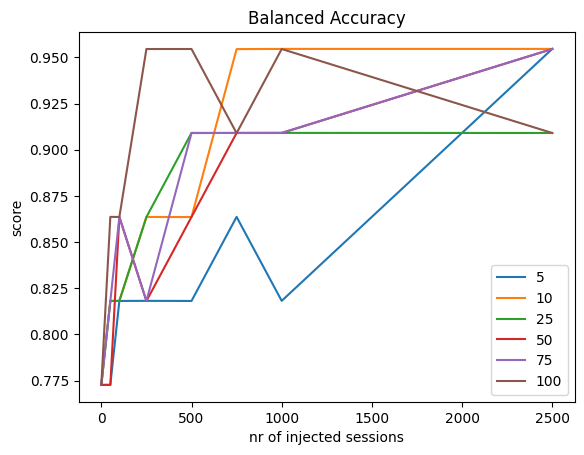

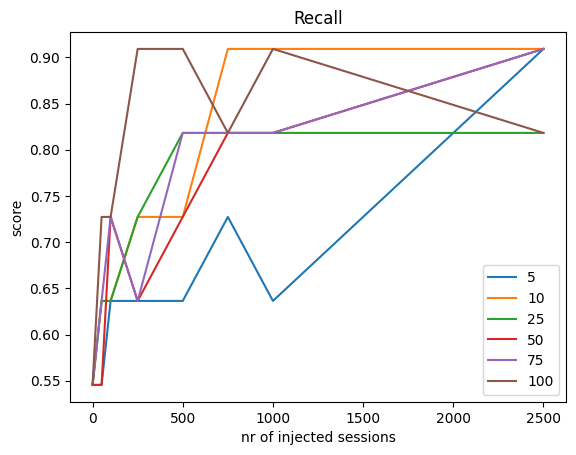

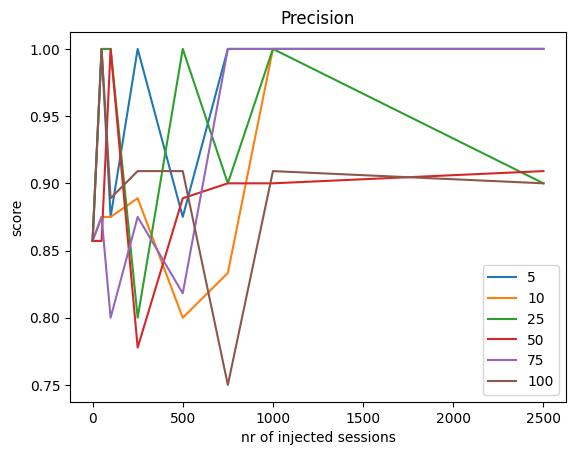

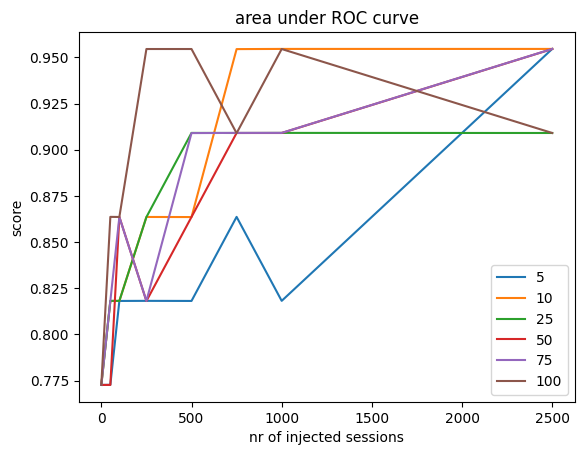

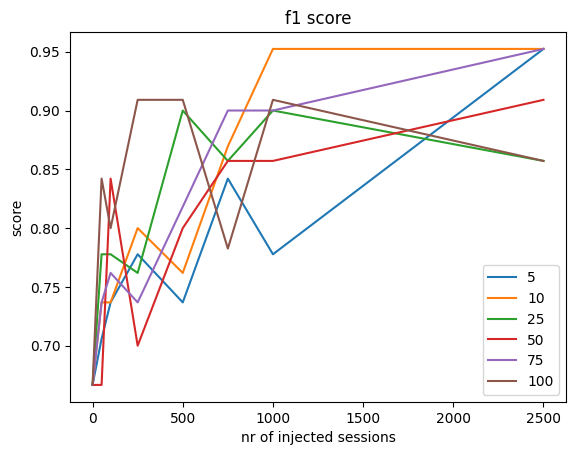

In [38]:

balanced_accuracy = plot_column(new,'ball_acc',"Balanced Accuracy")
recall = plot_column(new,'recall',"Recall")
precision = plot_column(new,'precision',"Precision")
roc = plot_column(new,'roc_auc_score','area under ROC curve')
f1 = plot_column(new,'f1','f1 score')  

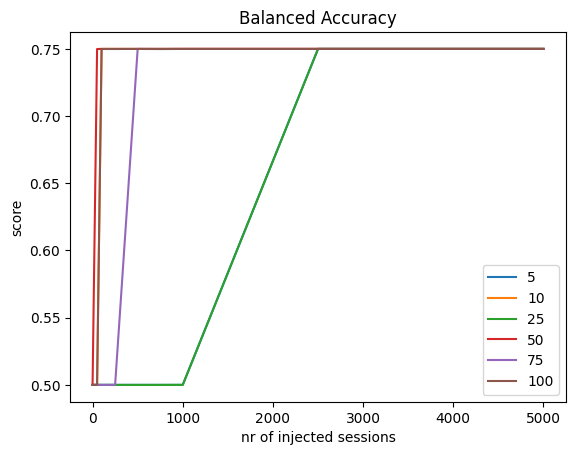

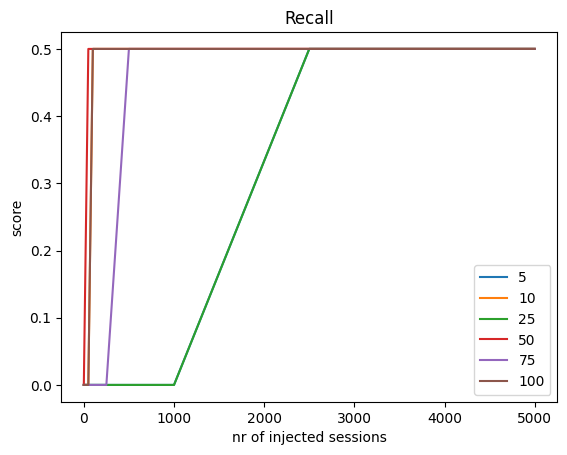

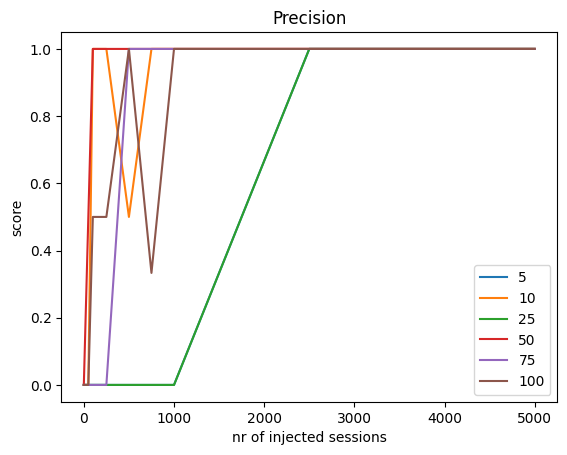

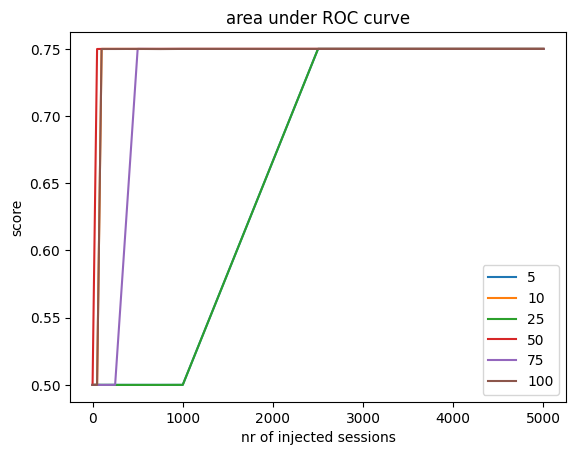

In [30]:
balanced_accuracy = plot_column(transitions,'ball_acc',"Balanced Accuracy")
recall = plot_column(transitions,'recall',"Recall")
precision = plot_column(transitions,'precision',"Precision")
roc = plot_column(transitions,'roc_auc_score','area under ROC curve') 

Activity

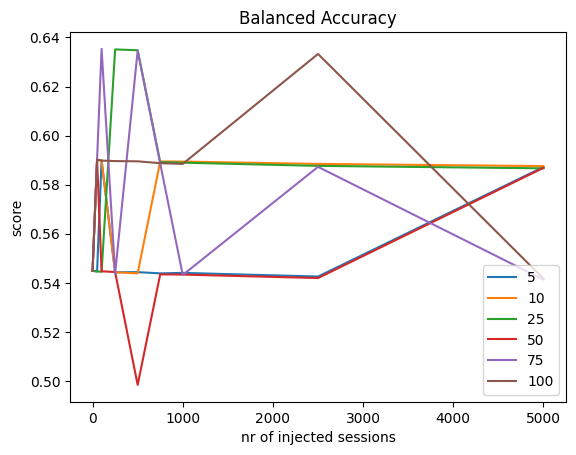

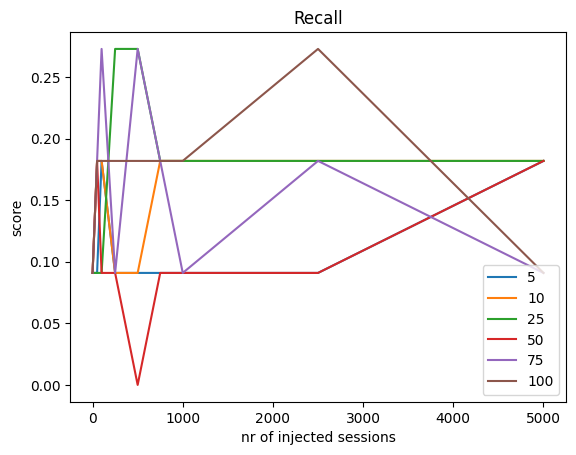

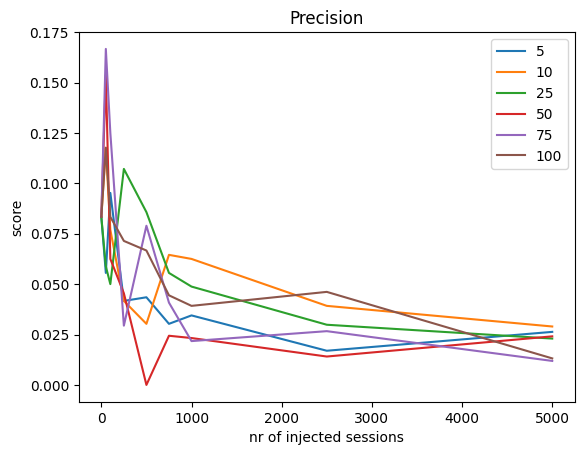

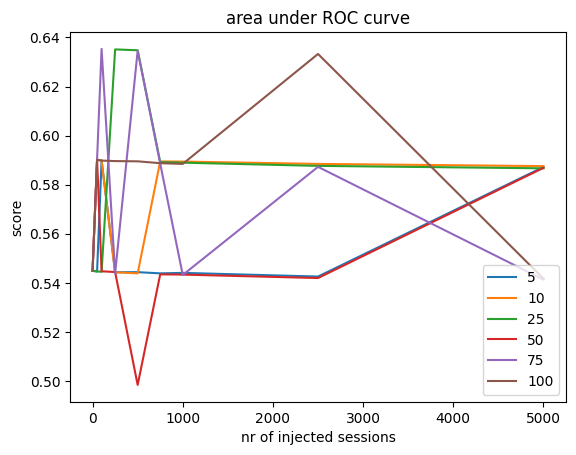

In [31]:
balanced_accuracy = plot_column(Activity,'ball_acc',"Balanced Accuracy")
recall = plot_column(Activity,'recall',"Recall")
precision = plot_column(Activity,'precision',"Precision")
roc = plot_column(Activity,'roc_auc_score','area under ROC curve') 

sample

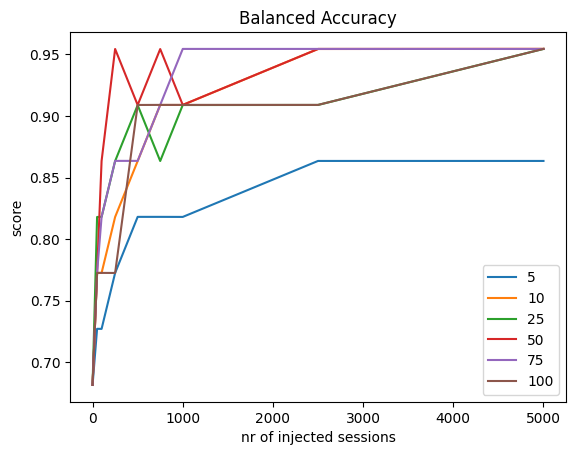

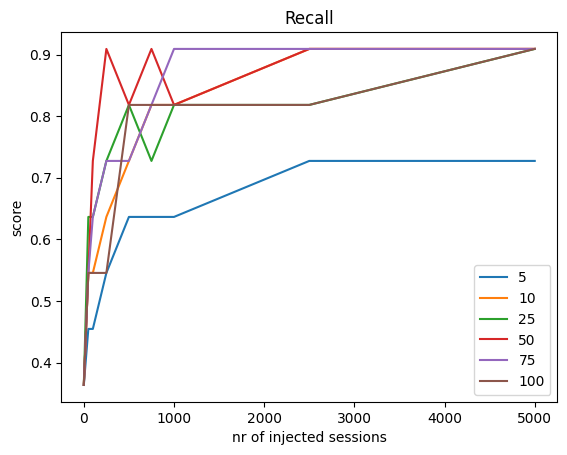

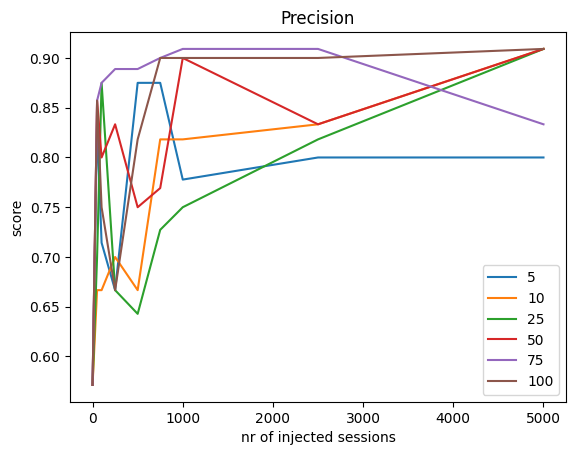

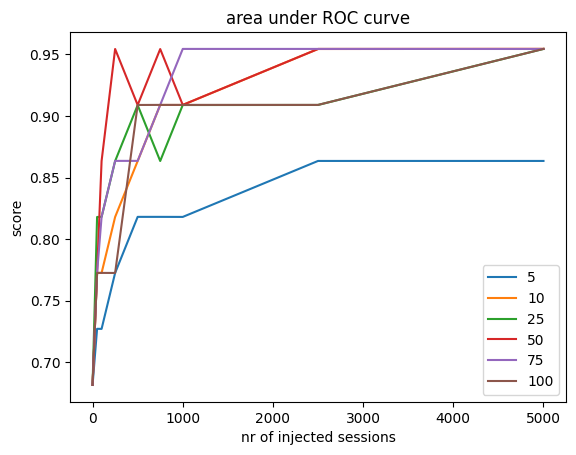

In [32]:
balanced_accuracy = plot_column(sample,'ball_acc',"Balanced Accuracy")
recall = plot_column(sample,'recall',"Recall")
precision = plot_column(sample,'precision',"Precision")
roc = plot_column(sample,'roc_auc_score','area under ROC curve') 

Activity_Patterns

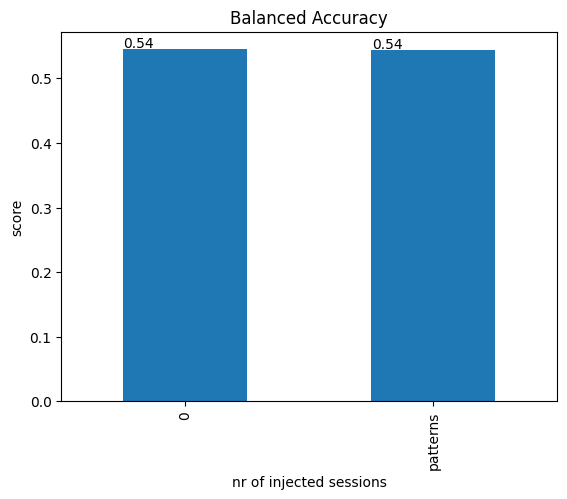

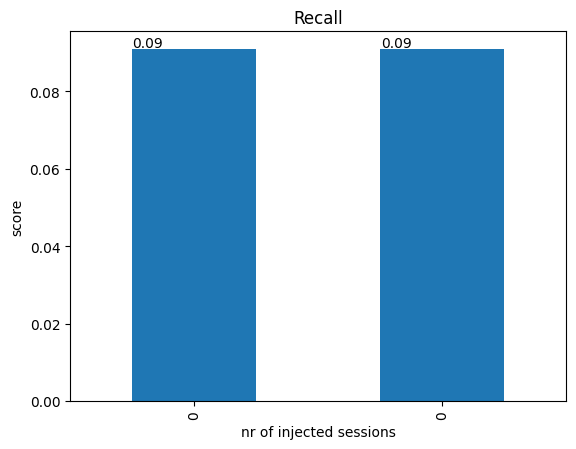

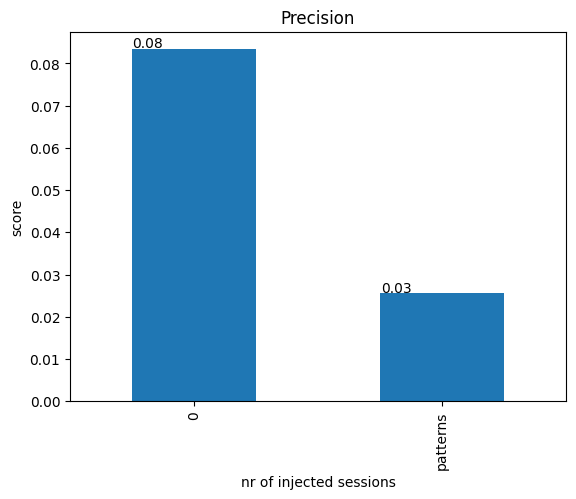

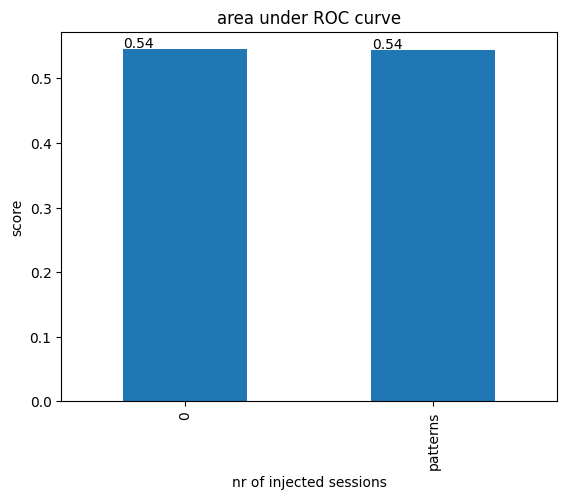

In [33]:
balanced_accuracy = plot_column_bar(Activity_Patterns,'ball_acc',"Balanced Accuracy",legend=False)
recall = plot_column_bar(Activity_Patterns,'recall',"Recall",'deviation_rate',legend=False)
precision = plot_column_bar(Activity_Patterns,'precision',"Precision",legend=False)
roc = plot_column_bar(Activity_Patterns,'roc_auc_score','area under ROC curve',legend=False) 

Transitions_Patterns

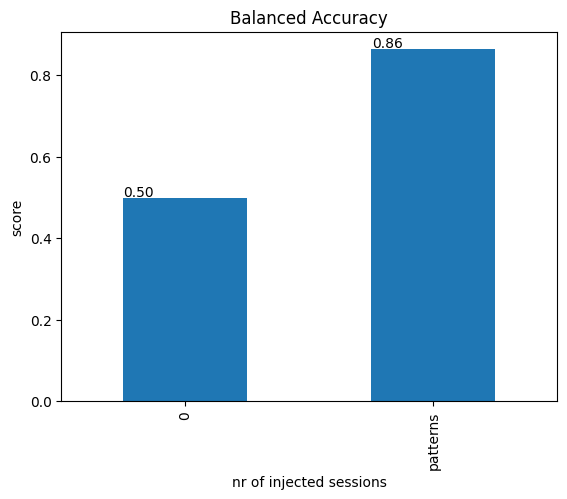

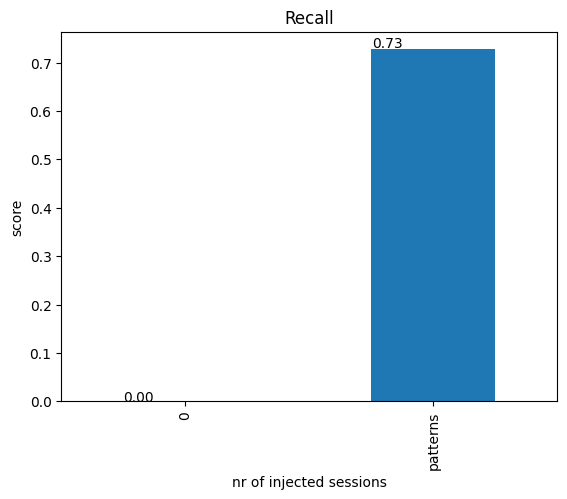

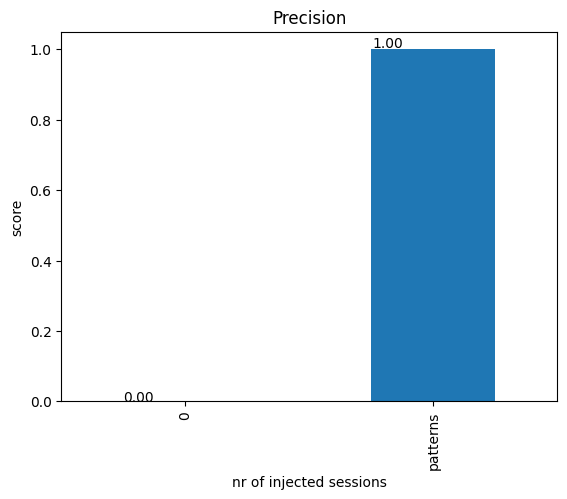

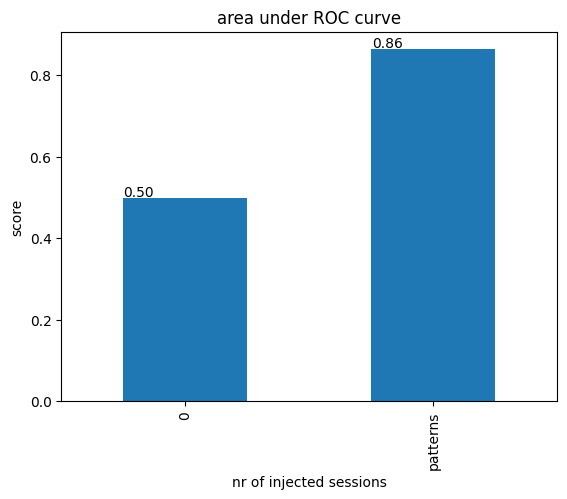

In [34]:
balanced_accuracy = plot_column_bar(Transitions_Patterns,'ball_acc',"Balanced Accuracy",legend=False)
recall = plot_column_bar(Transitions_Patterns,'recall',"Recall",legend=False)
precision = plot_column_bar(Transitions_Patterns,'precision',"Precision",legend=False)
roc = plot_column_bar(Transitions_Patterns,'roc_auc_score','area under ROC curve',legend=False) 